# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#import dataset
time_df = pd.read_csv("/Users/praing57504/Desktop/Data science/Assignments/4_Simple Linear Regression/delivery_time.csv")
time_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [3]:
#datframe information
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#duplicate rows
time_df[time_df.duplicated()].count()

Delivery Time    0
Sorting Time     0
dtype: int64

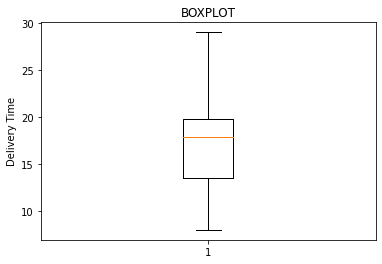

In [5]:
#boxplot to check outliers for Delivery time
plt.boxplot(time_df["Delivery Time"])
plt.title("BOXPLOT")
plt.ylabel("Delivery Time")
plt.show()

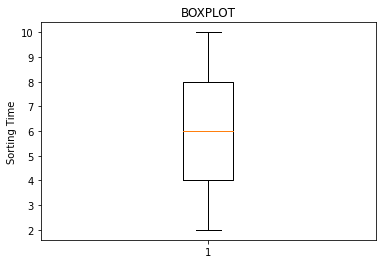

In [6]:
#boxplot to check outliers for Sorting time
plt.boxplot(time_df["Sorting Time"])
plt.title("BOXPLOT")
plt.ylabel("Sorting Time")
plt.show()

In [7]:
#Rename the column names, as spaces are not allowed in variable for formula
time_df_eda = time_df.rename({"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"}, axis=1)

In [8]:
#Correlation between the independent and dependent variable
time_df_eda.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


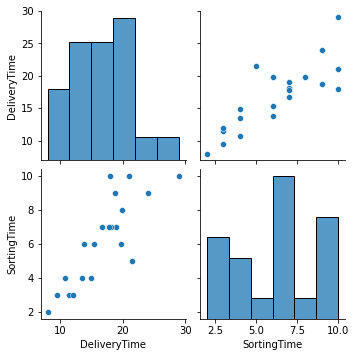

In [9]:
#pairplot
sns.pairplot(time_df_eda);

C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

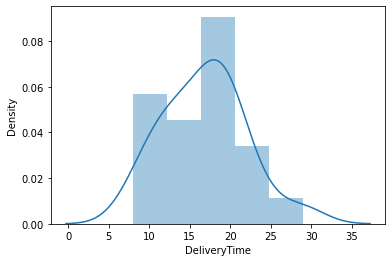

In [10]:
#Distplot to check weather data is normally distributed or not
sns.distplot(time_df_eda["DeliveryTime"])

C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

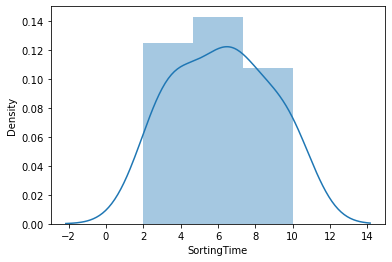

In [11]:
#Distplot to check weather data is normally distributed or not
sns.distplot(time_df_eda["SortingTime"])

In [12]:
#appliying log transformation on the data
time_df_log = time_df_eda.apply(np.log)

# Model Building

In [13]:
#model
model = smf.ols("DeliveryTime~SortingTime", data = time_df_log).fit()

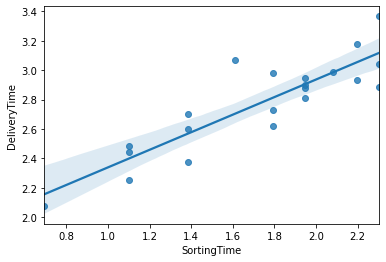

In [14]:
#regression line
sns.regplot(x="SortingTime", y="DeliveryTime", data=time_df_log);

In [15]:
#Coeffiecients
model.params

Intercept      1.741987
SortingTime    0.597522
dtype: float64

In [16]:
#t-values and p-values
print(model.tvalues, '\n', model.pvalues) 

Intercept      13.085552
SortingTime     8.024484
dtype: float64 
 Intercept      5.921137e-11
SortingTime    1.601539e-07
dtype: float64


In [17]:
#Model score
round(model.rsquared,2)

0.77

# 2) Salary_hike -> Build a prediction model for Salary_hike

In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [19]:
#import dataset
salary_df = pd.read_csv("/Users/praing57504/Desktop/Data science/Assignments/4_Simple Linear Regression/Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [20]:
#datframe information
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [21]:
#duplicate rows
salary_df[salary_df.duplicated()].count()

YearsExperience    0
Salary             0
dtype: int64

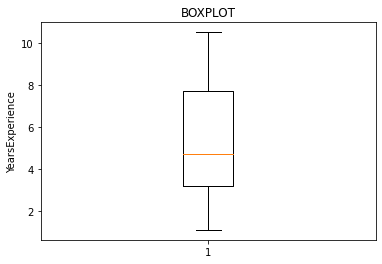

In [22]:
#boxplot to check outliers for YearsExperience
plt.boxplot(salary_df["YearsExperience"])
plt.title("BOXPLOT")
plt.ylabel("YearsExperience")
plt.show()

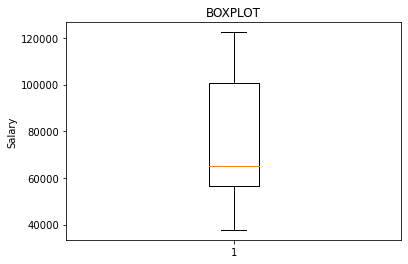

In [23]:
#boxplot to check outliers for Salary
plt.boxplot(salary_df["Salary"])
plt.title("BOXPLOT")
plt.ylabel("Salary")
plt.show()

In [24]:
#Correlation between the independent and dependent variable
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


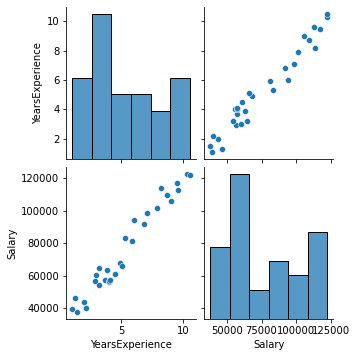

In [25]:
#pairplot
sns.pairplot(salary_df);

C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


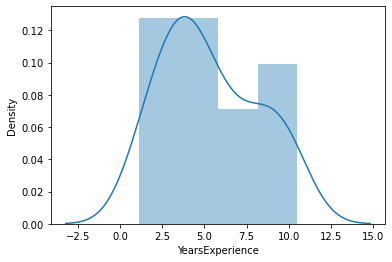

In [26]:
#Distplot to check weather data is normally distributed or not
sns.distplot(salary_df["YearsExperience"]);

C:\Users\praing57504\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


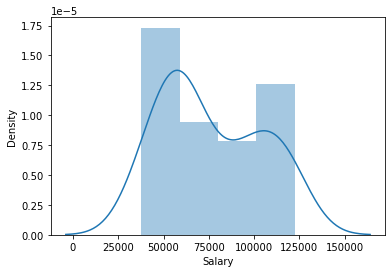

In [27]:
#Distplot to check weather data is normally distributed or not
sns.distplot(salary_df["Salary"]);

# Model

In [28]:
#model
model_sal_cal = smf.ols("Salary ~ YearsExperience",data=salary_df).fit()

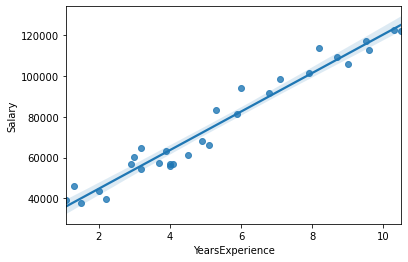

In [29]:
#regression line
sns.regplot(x="YearsExperience",y="Salary", data=salary_df);

In [30]:
#coeffiecients
model_sal_cal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
#t-values and p-values
model_sal_cal.tvalues, model_sal_cal.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [32]:
#model rsquared value
round(model_sal_cal.rsquared,2)

0.96